In [1]:
#import necessary libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv("Walmart.csv")
df.head()

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
0,1,05-02-2010,1643690.90,0,42.31,2.572,211.096358,8.106
1,1,12-02-2010,1641957.44,1,38.51,2.548,211.242170,8.106
2,1,19-02-2010,1611968.17,0,39.93,2.514,211.289143,8.106
3,1,26-02-2010,1409727.59,0,46.63,2.561,211.319643,8.106
4,1,05-03-2010,1554806.68,0,46.50,2.625,211.350143,8.106


In [3]:
#information about the dataset 

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6435 entries, 0 to 6434
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Store         6435 non-null   int64  
 1   Date          6435 non-null   object 
 2   Weekly_Sales  6435 non-null   float64
 3   Holiday_Flag  6435 non-null   int64  
 4   Temperature   6435 non-null   float64
 5   Fuel_Price    6435 non-null   float64
 6   CPI           6435 non-null   float64
 7   Unemployment  6435 non-null   float64
dtypes: float64(5), int64(2), object(1)
memory usage: 402.3+ KB


The df.info() is a function to get the information about the dataset. 
--> The no. of rows and columns in the dataset.
--> The names of the columns and the datatype of each column.
--> Amt of memory used by the dataframe.
--> Whether any missing values is there or not.

In [4]:
#description of the dataset 

df.describe()

,Store,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
count,6435.000000,6.435000e+03,6435.000000,6435.000000,6435.000000,6435.000000,6435.000000
mean,23.000000,1.046965e+06,0.069930,60.663782,3.358607,171.578394,7.999151
std,12.988182,5.643666e+05,0.255049,18.444933,0.459020,39.356712,1.875885
min,1.000000,2.099862e+05,0.000000,-2.060000,2.472000,126.064000,3.879000
25%,12.000000,5.533501e+05,0.000000,47.460000,2.933000,131.735000,6.891000
50%,23.000000,9.607460e+05,0.000000,62.670000,3.445000,182.616521,7.874000
75%,34.000000,1.420159e+06,0.000000,74.940000,3.735000,212.743293,8.622000
max,45.000000,3.818686e+06,1.000000,100.140000,4.468000,227.232807,14.313000


The df.describe() function is used to get 
1) Count of the non null values in each column in a dataset. 
2) Mean of the columns.
3) Standard deviation of the columns.
4) Minimum and maximum value of the column.
5) Quartiles like 25%, 50%, 75% values of the columns.
From this we will get to know the central tendancies, distribution and spread of the numerical values.

In [5]:
#columns present in the dataset.

df.columns

Index(['Store', 'Date', 'Weekly_Sales', 'Holiday_Flag', 'Temperature',
       'Fuel_Price', 'CPI', 'Unemployment'],
      dtype='object')

The df.columns will retrieve the columns present in the dataset.It helps us get the names of the columns in a DataFrame, allowing us to access, manipulate, or iterate over them as needed.

1) Store - The store number
2) Date - The week of sales
3) Weekly_sales - Weekly sales for a store
4) Holiday_flag - 1 for week being holiday and 0 being non-holiday week
5) Temperature - Temperature on sale day.
6) Fuel price - fuel price in the region.
7) CPI - consumer price index
8) Unemployment - prevailing(current) unemployment rate.

In [6]:
#data types of the columns in the dataset

df.dtypes

Store             int64
Date             object
Weekly_Sales    float64
Holiday_Flag      int64
Temperature     float64
Fuel_Price      float64
CPI             float64
Unemployment    float64
dtype: object

df.dtypes is helpful for understanding the nature of the data in each column. It returns a series as the index contains the column names and the corresponding data type.

In [7]:
#shape of the dataset

df.shape

(6435, 8)

df.shape returns the tuple which contains the dimensions of the dataframe. It is used to retrieve the number of rows and columns in a DataFrame, providing important information about its size and structure.

In [8]:
#check whether any duplicate values is there or not

df.duplicated()

0       False
1       False
2       False
3       False
4       False
        ...  
6430    False
6431    False
6432    False
6433    False
6434    False
Length: 6435, dtype: bool

In [9]:
df.duplicated().sum()

0

df.duplicated() is a method used to detect duplicate rows in a DataFrame, providing a boolean series that indicates which rows are duplicates and which are not.

In [10]:
#check for null values

df.isna().sum()

Store           0
Date            0
Weekly_Sales    0
Holiday_Flag    0
Temperature     0
Fuel_Price      0
CPI             0
Unemployment    0
dtype: int64

In [11]:
df.isnull().sum()

Store           0
Date            0
Weekly_Sales    0
Holiday_Flag    0
Temperature     0
Fuel_Price      0
CPI             0
Unemployment    0
dtype: int64

df.isna().sum() - obtain the count of missing values in each column. It helps you understand the completeness of your data and identify columns that have a significant number of missing values.

In [12]:
#checking outliers on weekly sales

df.loc[df['Weekly_Sales']<=0]

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment


In [13]:
print(df['Weekly_Sales'].min())
print(df['Weekly_Sales'].max())
print(df['Weekly_Sales'].median())
print(df['Weekly_Sales'].mean())

209986.25
3818686.45
960746.04
1046964.8775617732


In [14]:
#converting the date in object format to date-time format 

df['Date'] = pd.to_datetime(df['Date'])
df.head()

C:\Users\Shanthini\anaconda3\lib\site-packages\pandas\core\tools\datetimes.py:1047: UserWarning: Parsing '19-02-2010' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  cache_array = _maybe_cache(arg, format, cache, convert_listlike)
C:\Users\Shanthini\anaconda3\lib\site-packages\pandas\core\tools\datetimes.py:1047: UserWarning: Parsing '26-02-2010' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  cache_array = _maybe_cache(arg, format, cache, convert_listlike)
C:\Users\Shanthini\anaconda3\lib\site-packages\pandas\core\tools\datetimes.py:1047: UserWarning: Parsing '19-03-2010' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  cache_array = _maybe_cache(arg, format, cache, convert_listlike)
C:\Users\Shanthini\anaconda3\lib\site-packages\pandas\core\tools\datetimes.py:1047: UserWarning: Parsing '26-03-2010' in DD/MM/YYYY format. Provide 

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
0,1,2010-05-02,1643690.90,0,42.31,2.572,211.096358,8.106
1,1,2010-12-02,1641957.44,1,38.51,2.548,211.242170,8.106
2,1,2010-02-19,1611968.17,0,39.93,2.514,211.289143,8.106
3,1,2010-02-26,1409727.59,0,46.63,2.561,211.319643,8.106
4,1,2010-05-03,1554806.68,0,46.50,2.625,211.350143,8.106


pd.to_datetime() -- function in pandas to convert the series of values into datetime format. Takes series as an argument.

In [15]:
df.dtypes

Store                    int64
Date            datetime64[ns]
Weekly_Sales           float64
Holiday_Flag             int64
Temperature            float64
Fuel_Price             float64
CPI                    float64
Unemployment           float64
dtype: object

In [16]:
df.sort_values(by='Date',ascending = False)

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
4144,29,2012-12-10,513737.00,0,54.18,4.029,138.911700,9.151
5574,39,2012-12-10,1494417.07,0,69.88,3.601,222.051079,6.228
712,5,2012-12-10,325345.41,0,66.24,3.601,223.974787,5.422
4573,32,2012-12-10,1176681.31,0,43.49,3.760,199.053937,7.557
5717,40,2012-12-10,982523.26,0,47.35,4.029,138.911700,4.145
...,...,...,...,...,...,...,...,...
1321,10,2010-01-10,1645892.97,0,86.01,3.001,126.234600,9.003
3180,23,2010-01-10,1129909.44,0,62.07,2.717,132.756800,5.287
5754,41,2010-01-10,1109216.35,0,62.67,2.759,190.673824,7.508
5468,39,2010-01-10,1219583.91,0,72.74,2.603,210.440443,8.476


In [17]:
#lets split the date column into day, month, year 

df['Day'] = pd.DatetimeIndex(df['Date']).day
df['Month'] = pd.DatetimeIndex(df['Date']).month
df['Year'] = pd.DatetimeIndex(df['Date']).year

In [18]:
df.head()

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment,Day,Month,Year
0,1,2010-05-02,1643690.90,0,42.31,2.572,211.096358,8.106,2,5,2010
1,1,2010-12-02,1641957.44,1,38.51,2.548,211.242170,8.106,2,12,2010
2,1,2010-02-19,1611968.17,0,39.93,2.514,211.289143,8.106,19,2,2010
3,1,2010-02-26,1409727.59,0,46.63,2.561,211.319643,8.106,26,2,2010
4,1,2010-05-03,1554806.68,0,46.50,2.625,211.350143,8.106,3,5,2010


OBJECTIVES OF THE ANALYSIS : 

1) Which store has minimum and maximum sales?

2) Which store has maximum standard deviation i.e., the sales vary a lot. Also, find out the coefficient of mean to standard deviation

3) Which store/s has good quarterly growth rate in Q3’2012

4) Some holidays have a negative impact on sales. Find out holidays which have higher sales than the mean sales in non-holiday season for all stores together

5) Provide a monthly and semester view of sales in units and give insights

6) Build prediction to forecast demand.

In [19]:
df['Store'].unique()

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,
       35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45], dtype=int64)

In [20]:
#minimum and maximum sales

weekly_sales_per_store = df.groupby('Store')['Weekly_Sales'].sum().sort_values()
weekly_sales_per_store

Store
33    3.716022e+07
44    4.329309e+07
5     4.547569e+07
36    5.341221e+07
38    5.515963e+07
3     5.758674e+07
30    6.271689e+07
37    7.420274e+07
16    7.425243e+07
29    7.714155e+07
9     7.778922e+07
42    7.956575e+07
7     8.159828e+07
15    8.913368e+07
43    9.056544e+07
25    1.010612e+08
21    1.081179e+08
45    1.123953e+08
17    1.277821e+08
8     1.299512e+08
35    1.315207e+08
40    1.378703e+08
34    1.382498e+08
26    1.434164e+08
12    1.442872e+08
22    1.470756e+08
18    1.551147e+08
32    1.668192e+08
41    1.813419e+08
28    1.892637e+08
11    1.939628e+08
24    1.940160e+08
23    1.987506e+08
31    1.996139e+08
19    2.066349e+08
39    2.074455e+08
1     2.224028e+08
6     2.237561e+08
27    2.538559e+08
10    2.716177e+08
2     2.753824e+08
13    2.865177e+08
14    2.889999e+08
4     2.995440e+08
20    3.013978e+08
Name: Weekly_Sales, dtype: float64

*step 1 : grouping the 'Weekly_Sales' data based on the particular store 
*step 2 : and then sum it 

In [21]:
total_sales_per_store = np.array(weekly_sales_per_store)
total_sales_per_store

array([3.71602220e+07, 4.32930878e+07, 4.54756889e+07, 5.34122150e+07,
       5.51596264e+07, 5.75867351e+07, 6.27168851e+07, 7.42027403e+07,
       7.42524254e+07, 7.71415543e+07, 7.77892190e+07, 7.95657524e+07,
       8.15982751e+07, 8.91336839e+07, 9.05654354e+07, 1.01061179e+08,
       1.08117879e+08, 1.12395341e+08, 1.27782139e+08, 1.29951181e+08,
       1.31520672e+08, 1.37870310e+08, 1.38249763e+08, 1.43416394e+08,
       1.44287230e+08, 1.47075649e+08, 1.55114734e+08, 1.66819246e+08,
       1.81341935e+08, 1.89263681e+08, 1.93962787e+08, 1.94016021e+08,
       1.98750618e+08, 1.99613906e+08, 2.06634862e+08, 2.07445542e+08,
       2.22402809e+08, 2.23756131e+08, 2.53855917e+08, 2.71617714e+08,
       2.75382441e+08, 2.86517704e+08, 2.88999911e+08, 2.99543953e+08,
       3.01397792e+08])

Text(0, 0.5, 'Sales')

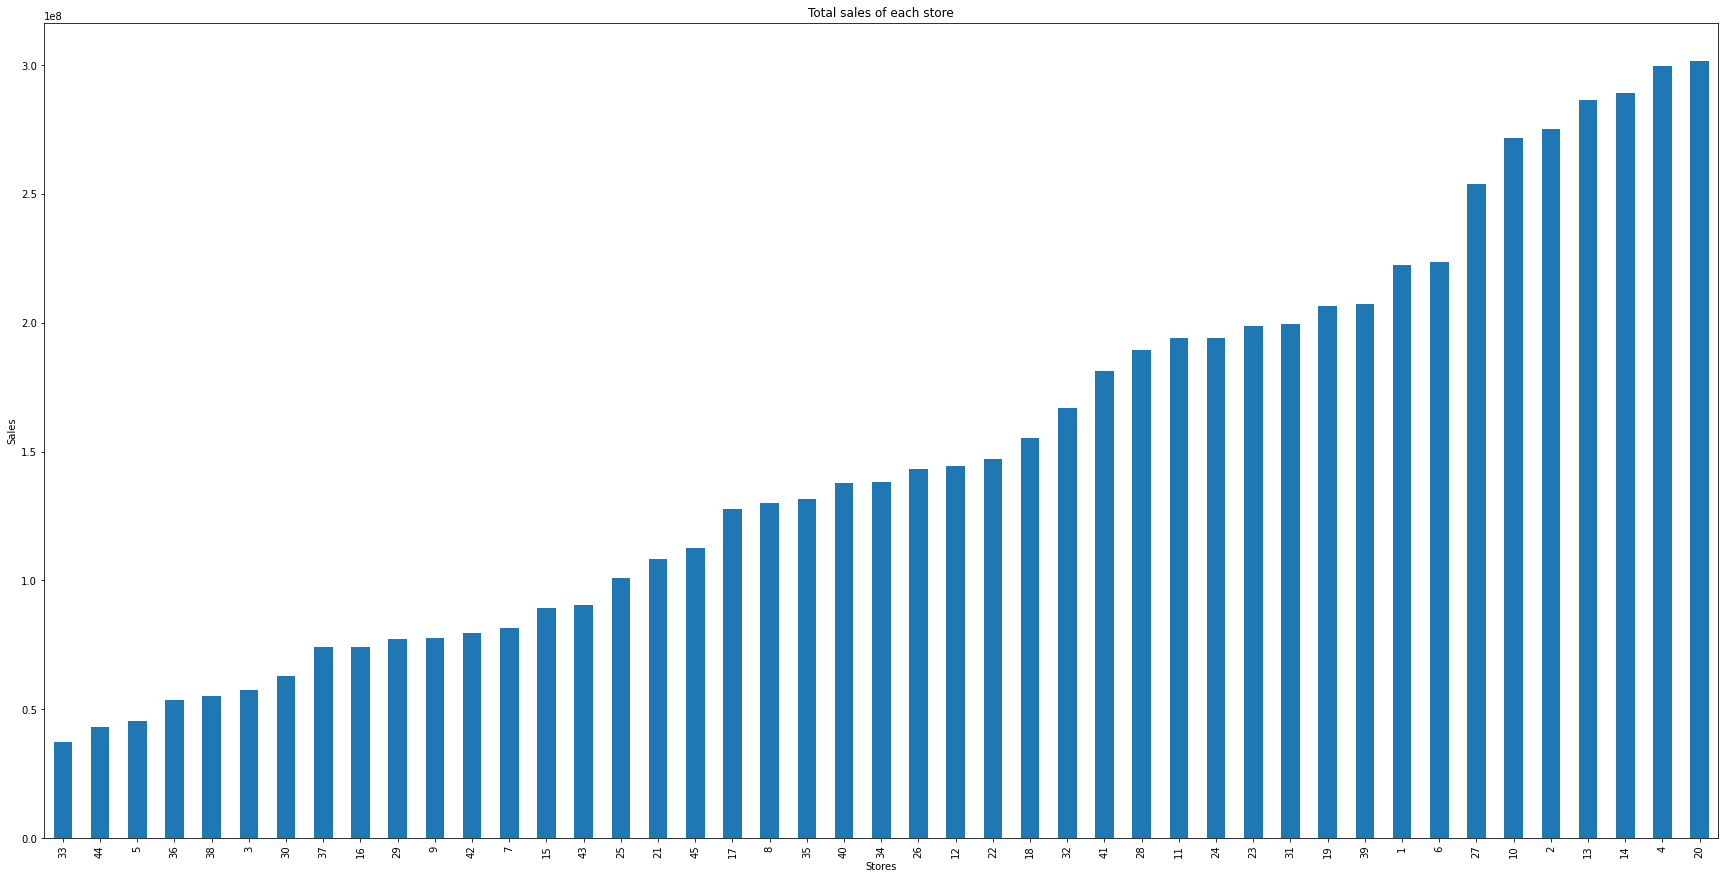

In [22]:
plt.figure(figsize=(30,15))
weekly_sales_per_store.plot(kind='bar')
plt.title("Total sales of each store")
plt.xlabel("Stores")
plt.ylabel("Sales")

From the above figure, it is inferred that the store 33 has the minimum sales and the store 20 has the maximum sales.

In [23]:
#grouping the data by stores.
df_new = df.groupby('Store')

In [24]:
df_new.head()

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment,Day,Month,Year
0,1,2010-05-02,1643690.90,0,42.31,2.572,211.096358,8.106,2,5,2010
1,1,2010-12-02,1641957.44,1,38.51,2.548,211.242170,8.106,2,12,2010
2,1,2010-02-19,1611968.17,0,39.93,2.514,211.289143,8.106,19,2,2010
3,1,2010-02-26,1409727.59,0,46.63,2.561,211.319643,8.106,26,2,2010
4,1,2010-05-03,1554806.68,0,46.50,2.625,211.350143,8.106,3,5,2010
...,...,...,...,...,...,...,...,...,...,...,...
6292,45,2010-05-02,890689.51,0,27.31,2.784,181.871190,8.992,2,5,2010
6293,45,2010-12-02,656988.64,1,27.73,2.773,181.982317,8.992,2,12,2010
6294,45,2010-02-19,841264.04,0,31.27,2.745,182.034782,8.992,19,2,2010
6295,45,2010-02-26,741891.65,0,34.89,2.754,182.077469,8.992,26,2,2010


In [25]:
df['Store'].value_counts()

1     143
24    143
26    143
27    143
28    143
29    143
30    143
31    143
32    143
33    143
34    143
35    143
36    143
37    143
38    143
39    143
40    143
41    143
42    143
43    143
44    143
25    143
23    143
2     143
22    143
3     143
4     143
5     143
6     143
7     143
8     143
9     143
10    143
11    143
12    143
13    143
14    143
15    143
16    143
17    143
18    143
19    143
20    143
21    143
45    143
Name: Store, dtype: int64

In [26]:
df_new = pd.DataFrame(df.groupby('Store')['Weekly_Sales'].std().sort_values(ascending = False))
df_new.head()

,Weekly_Sales
Store,
14,317569.949476
10,302262.062504
20,275900.562742
4,266201.442297
13,265506.995776


From the above output, it is inferred that Store - 14 has the maximum standard deviation

In [27]:
#finding the store with maximum average sales

df_avg_sales = pd.DataFrame(df.groupby('Store')['Weekly_Sales'].mean().sort_values(ascending=False))
df_avg_sales.head()

,Weekly_Sales
Store,
20,2.107677e+06
4,2.094713e+06
14,2.020978e+06
13,2.003620e+06
2,1.925751e+06


In [28]:
#finding the store with maximum median sales

df_avg_sales = pd.DataFrame(df.groupby('Store')['Weekly_Sales'].median().sort_values(ascending=False))
df_avg_sales.head()

,Weekly_Sales
Store,
4,2073951.38
20,2053165.41
14,2004330.30
13,1958823.56
2,1879107.31


In [29]:
print("The store with maximum standard dev = "+str(df_new.head(1).index[0]))

The store with maximum standard dev = 14


C:\Users\Shanthini\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'The Sales Distribution of the store 14')

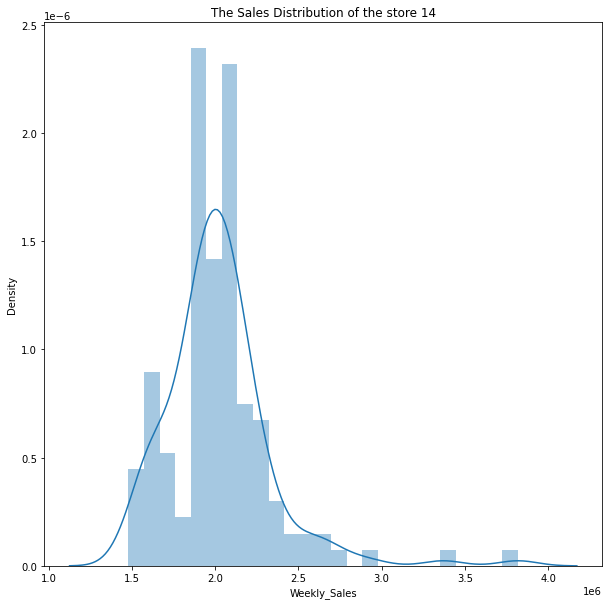

In [30]:
#lets plot the distribution of the store with maximum standard deviation 

plt.figure(figsize=(10,10))
sns.distplot(df[df['Store']==df_new.head(1).index[0]]['Weekly_Sales'])
plt.title("The Sales Distribution of the store "+str(df_new.head(1).index[0]))

In [31]:
#finding the coefficient of mean to std 

df['Co-efficient of Mean to Std'] = df.groupby('Store')['Weekly_Sales'].std() / df.groupby('Store')['Weekly_Sales'].mean()
df.head()

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment,Day,Month,Year,Co-efficient of Mean to Std
0,1,2010-05-02,1643690.90,0,42.31,2.572,211.096358,8.106,2,5,2010,NaN
1,1,2010-12-02,1641957.44,1,38.51,2.548,211.242170,8.106,2,12,2010,0.100292
2,1,2010-02-19,1611968.17,0,39.93,2.514,211.289143,8.106,19,2,2010,0.123424
3,1,2010-02-26,1409727.59,0,46.63,2.561,211.319643,8.106,26,2,2010,0.115021
4,1,2010-05-03,1554806.68,0,46.50,2.625,211.350143,8.106,3,5,2010,0.127083


In [32]:
#finding the coefficient of mean to std as percentage

df['Co-efficient of Mean to Std'] = (df.groupby('Store')['Weekly_Sales'].std() / df.groupby('Store')['Weekly_Sales'].mean())*100
df.head()

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment,Day,Month,Year,Co-efficient of Mean to Std
0,1,2010-05-02,1643690.90,0,42.31,2.572,211.096358,8.106,2,5,2010,NaN
1,1,2010-12-02,1641957.44,1,38.51,2.548,211.242170,8.106,2,12,2010,10.029212
2,1,2010-02-19,1611968.17,0,39.93,2.514,211.289143,8.106,19,2,2010,12.342388
3,1,2010-02-26,1409727.59,0,46.63,2.561,211.319643,8.106,26,2,2010,11.502141
4,1,2010-05-03,1554806.68,0,46.50,2.625,211.350143,8.106,3,5,2010,12.708254


If the value equals 1 or 100%, the std dev equals the mean. Values less than 1 indicate that the std dev is smaller than the mean (typical), while values greater than 1 occurs when the std dev is greater than the mean.

In [33]:
date = np.array(df['Date'].unique())
date 

array(['2010-05-02T00:00:00.000000000', '2010-12-02T00:00:00.000000000',
       '2010-02-19T00:00:00.000000000', '2010-02-26T00:00:00.000000000',
       '2010-05-03T00:00:00.000000000', '2010-12-03T00:00:00.000000000',
       '2010-03-19T00:00:00.000000000', '2010-03-26T00:00:00.000000000',
       '2010-02-04T00:00:00.000000000', '2010-09-04T00:00:00.000000000',
       '2010-04-16T00:00:00.000000000', '2010-04-23T00:00:00.000000000',
       '2010-04-30T00:00:00.000000000', '2010-07-05T00:00:00.000000000',
       '2010-05-14T00:00:00.000000000', '2010-05-21T00:00:00.000000000',
       '2010-05-28T00:00:00.000000000', '2010-04-06T00:00:00.000000000',
       '2010-11-06T00:00:00.000000000', '2010-06-18T00:00:00.000000000',
       '2010-06-25T00:00:00.000000000', '2010-02-07T00:00:00.000000000',
       '2010-09-07T00:00:00.000000000', '2010-07-16T00:00:00.000000000',
       '2010-07-23T00:00:00.000000000', '2010-07-30T00:00:00.000000000',
       '2010-06-08T00:00:00.000000000', '2010-08-13

In [34]:
#Finding out which store has good quarterly growth in each quarter in 2012

#Quarter 1 from Jan to March

q1 = df[(df['Date']>'2012-01-01') & (df['Date']<'2012-03-31')].groupby('Store')['Weekly_Sales'].sum()
print("Sales of each store in the first quarter : ")
print(q1)
print()
print("Store with maximum sales in the quarter 1 is : " + str(q1.max()))
print()
print("Store index is : " + str(q1.idxmax()))

Sales of each store in the first quarter : 
Store
1     18951097.69
2     22543946.63
3      4957435.81
4     25659307.85
5      3912829.61
6     18191088.24
7      7216352.11
8     10834016.00
9      6623242.25
10    22376375.54
11    16202430.64
12    12267395.71
13    23340887.21
14    22225623.53
15     6586066.31
16     5982535.66
17    10338447.72
18    12136694.32
19    15905505.82
20    24642304.47
21     8531614.31
22    11425426.54
23    15140693.71
24    15057398.56
25     7752460.37
26    11096710.89
27    19105225.09
28    15617470.91
29     5922233.10
30     5197470.42
31    16753747.76
32    13583819.16
33     3070268.02
34    11533952.51
35     9123431.89
36     3792673.99
37     6337965.28
38     5149603.50
39    17597067.88
40    10877618.98
41    14805255.21
42     6947586.27
43     7581906.30
44     3821348.55
45     9073434.67
Name: Weekly_Sales, dtype: float64

Store with maximum sales in the quarter 1 is : 25659307.85

Store index is : 4


In [35]:
#Quarter 2 from April to June 

q2 = df[(df['Date']>'2012-04-01') & (df['Date']<'2012-06-30')].groupby('Store')['Weekly_Sales'].sum()
print("Sales of Each store in the quarter 2 is : ")
print(q2)
print()
print("Max sales of the store in q2 is : "+ str(q2.max()))
print()
print("Store index is : "+ str(q2.idxmax()))

Sales of Each store in the quarter 2 is : 
Store
1     21036965.58
2     25085123.61
3      5562668.16
4     28384185.16
5      4427262.21
6     20728970.16
7      7613593.92
8     11934275.61
9      7431320.13
10    23598433.93
11    17879095.77
12    13193365.04
13    26803225.55
14    24427769.06
15     7867952.23
16     6626133.44
17    12918892.02
18    13834706.08
19    18315278.56
20    27550180.62
21     9226279.62
22    13329065.39
23    18283424.90
24    17768191.98
25     9247467.19
26    13218289.66
27    22593640.73
28    16985999.95
29     7034493.19
30     5786335.45
31    18249155.35
32    15415236.21
33     3512138.05
34    12858027.98
35    10753570.97
36     4090378.90
37     6859777.96
38     5732362.70
39    20191585.63
40    12849747.45
41    17560035.88
42     7608247.31
43     8239792.67
44     4322555.33
45    10278900.05
Name: Weekly_Sales, dtype: float64

Max sales of the store in q2 is : 28384185.16

Store index is : 4


In [36]:
#Quarter 3 from July to September 

q3 = df[(df['Date']>'2012-07-01') & (df['Date']<'2012-09-30')].groupby('Store')['Weekly_Sales'].sum()
print("Sales of Each store in the quarter 3 is : ")
print(q3)
print()
print("Max sales of the store in q3 is : "+ str(q3.max()))
print()
print("Store index is : "+ str(q3.idxmax()))

Sales of Each store in the quarter 3 is : 
Store
1     18633209.98
2     22396867.61
3      4966495.93
4     25652119.35
5      3880621.88
6     18341221.11
7      7322393.92
8     10873860.34
9      6528239.56
10    21169356.45
11    16094363.07
12    11777508.50
13    24319994.35
14    20140430.40
15     6909374.37
16     6441311.11
17    11533998.38
18    12507521.72
19    16644341.31
20    24665938.11
21     8403507.99
22    11818544.33
23    17103654.36
24    16125999.86
25     8309440.44
26    12417575.35
27    20191238.11
28    15055659.67
29     6127862.07
30     5181974.44
31    16454328.46
32    14142164.84
33     3177072.43
34    11476258.98
35    10252122.68
36     3578123.58
37     6250524.08
38     5129297.64
39    18899955.17
40    11647661.37
41    16373588.44
42     6830839.86
43     7376726.03
44     4020486.01
45     8851242.32
Name: Weekly_Sales, dtype: float64

Max sales of the store in q3 is : 25652119.35

Store index is : 4


In [37]:
#Quarter 4 from October to December 

q4 = df[(df['Date']>'2012-10-01') & (df['Date']<'2012-12-31')].groupby('Store')['Weekly_Sales'].sum()
print("Sales of Each store in the quarter 4 is : ")
print(q4)
print()
print("Max sales of the store in q4 is : "+ str(q4.max()))
print()
print("Store index is : "+ str(q4.idxmax()))

Sales of Each store in the quarter 4 is : 
Store
1      9580784.77
2     11470757.52
3      2537839.60
4     13075576.88
5      1948124.43
6      9053767.49
7      3215216.52
8      5591768.18
9      3391227.64
10    11084451.02
11     8008176.20
12     6096576.47
13    12243347.91
14    10647575.27
15     3464137.80
16     3052445.11
17     5494040.51
18     6439654.68
19     8347307.59
20    12969286.18
21     4090484.79
22     6082619.97
23     8240205.78
24     8234805.77
25     4181137.71
26     6243868.39
27    10029952.19
28     7669776.54
29     3159793.26
30     2629869.77
31     8427175.65
32     7139895.79
33     1676072.53
34     5870924.68
35     5108596.98
36     1825294.06
37     3164507.37
38     2619809.61
39     9197054.17
40     5797379.54
41     8148960.40
42     3563686.41
43     3776808.97
44     2022983.83
45     4520053.13
Name: Weekly_Sales, dtype: float64

Max sales of the store in q4 is : 13075576.879999999

Store index is : 4


List of holidays : 

Super Bowl: 07-Feb-10, 06-Feb-11, 05-Feb-12

Labour Day: 06-Sep-10, 05-Sep-11, 03-Sep-12

Thanksgiving: 25-Nov-10, 24-Nov-11, 22-Nov-12

Christmas: 25-Dec-10, 25-Dec-11, 25-Dec-12

In [38]:
#plot function to plot the sales
import datetime

def plot_line(df, holiday_dates,holiday_label):
    fig,ax = plt.subplots(figsize=(15,5))
    ax.plot(df['Date'],df['Weekly_Sales'],label=holiday_label)
    
    for day in holiday_dates:
        day = datetime.datetime.strptime(day,'%Y-%m-%d')
        plt.axvline(x=day,linestyle='--',c='r')
    
    plt.title(holiday_label)
    x_dates = df['Date'].dt.strftime('%Y-%m-%d').sort_values().unique()
    plt.plot()
    plt.show()

                                  "fig,ax = plt.subplots(figsize=(15,5))"
fig - represents the entire figure or the canvas 
ax - represents the axes of the figure 
plt.subplots() - function provided by Matplotlib that creates a new figure and a set of subplots or axes.
(15, 5) - indicates a width of 15 inches and a height of 5 inches for the figure.

                                  "ax.plot(df['Date'],df['Weekly_Sales'],label=holiday_label)"
ax: This is the axes object on which the plot will be drawn. It is typically obtained from a subplot or axes method call.
plot: This is the function in Matplotlib's pyplot module used to create a line plot.
df['Date']: This is the x-axis data for the plot. It represents the dates or timestamps along the x-axis. It is typically a column of a pandas DataFrame.
df['Weekly_Sales']: This is the y-axis data for the plot. It represents the weekly sales values corresponding to each date or timestamp.
label=holiday_label: This is an optional parameter that assigns a label to the plotted line. holiday_label should be a string that represents the label for the line in the plot. The label is used for creating a legend when multiple lines are plotted on the same axes.

                                    "day = datetime.datetime.strptime(day,'%Y-%m-%d')"
To convert a date string in the format YYYY-MM-DD into a datetime object in Python. The strptime method will parse the day string according to the provided format ('%Y-%m-%d') and create a datetime object representing that date.

                                      "plt.axvline(x=day,linestyle='--',c='r')"
This adds a vertical line across the axes
plt.axvline(): This is a function in Matplotlib's pyplot module used to draw a vertical line on a plot.
x=day: This is the x-axis position where the vertical line will be drawn. The day variable should represent a numerical value along the x-axis.
linestyle='--': This is an optional parameter that specifies the linestyle of the vertical line. In this case, '--' represents a dashed line.
c='r': This is an optional parameter that specifies the color of the vertical line. In this case, 'r' represents the color red.

                            "x_dates = df['Date'].dt.strftime('%Y-%m-%d').sort_values().unique()"

dt.strftime('%Y-%m-%d'): This applies the strftime method to format each datetime value in the 'Date' column as a string in the format 'YYYY-MM-DD'. The %Y represents the four-digit year, %m represents the two-digit month, and %d represents the two-digit day.

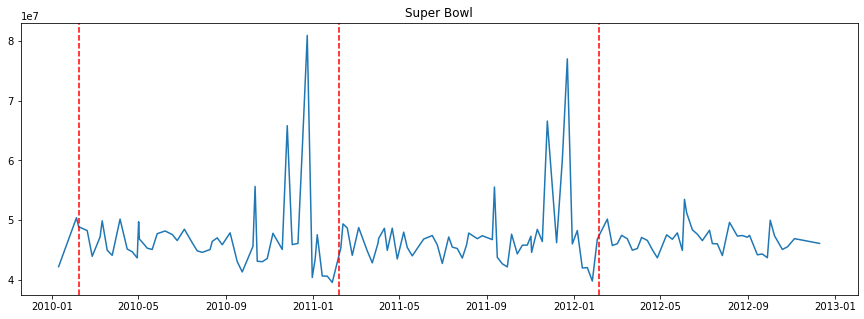

In [39]:
#impact of holidays on Sales 

total_sales = df.groupby('Date')['Weekly_Sales'].sum().reset_index()
super_bowl = ['2010-02-07','2011-02-06','2012-02-05']
plot_line(total_sales,super_bowl,'Super Bowl')

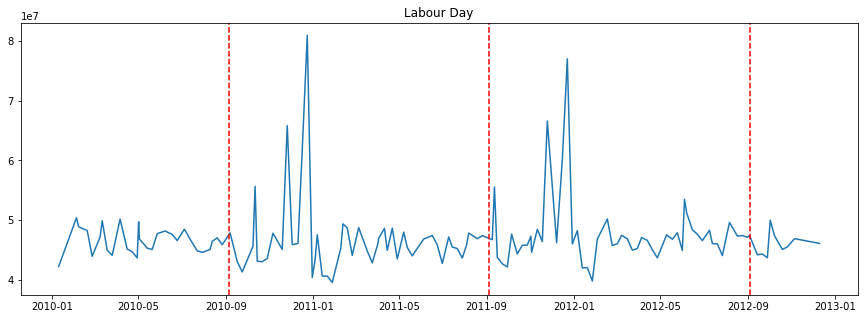

In [40]:
labour_day = ['2010-09-06','2011-09-05','2012-09-03']
plot_line(total_sales,labour_day,"Labour Day")

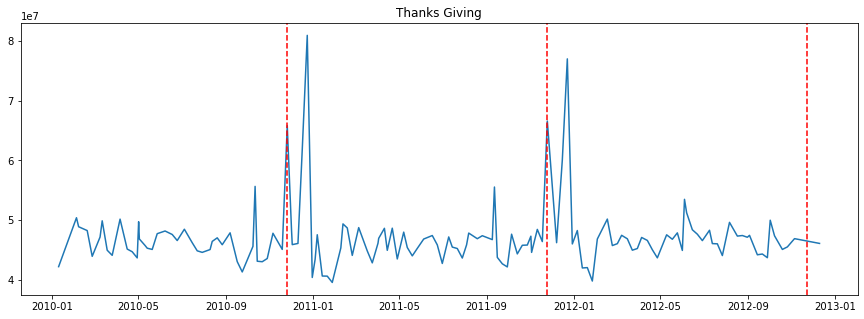

In [41]:
thanks_giving = ['2010-11-25','2011-11-24','2012-11-22']
plot_line(total_sales,thanks_giving,"Thanks Giving")

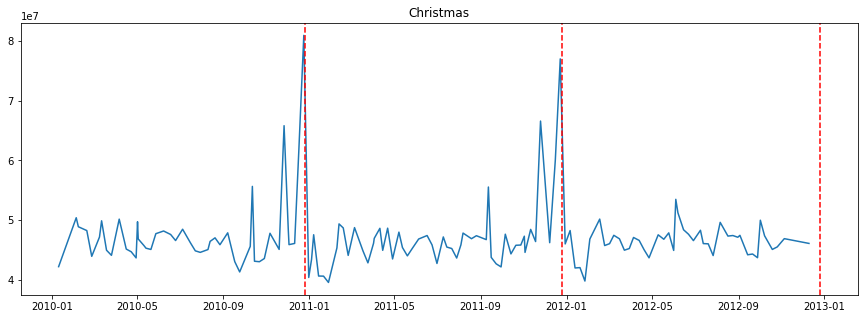

In [42]:
christmas = ['2010-12-25','2011-12-25','2012-12-25']
plot_line(total_sales,christmas,"Christmas")

Super bowl and labour day holiday seems that doesn't have any impact on the sales. On the other hand, the sales increased during thanks giving holidays and the sales decreased during the christmas holidays. 

In [43]:
df.columns

Index(['Store', 'Date', 'Weekly_Sales', 'Holiday_Flag', 'Temperature',
       'Fuel_Price', 'CPI', 'Unemployment', 'Day', 'Month', 'Year',
       'Co-efficient of Mean to Std'],
      dtype='object')

In [44]:
df['Month_Year'] = pd.to_datetime(df['Date']).dt.to_period('M')
df.head(2)

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment,Day,Month,Year,Co-efficient of Mean to Std,Month_Year
0,1,2010-05-02,1643690.90,0,42.31,2.572,211.096358,8.106,2,5,2010,NaN,2010-05
1,1,2010-12-02,1641957.44,1,38.51,2.548,211.242170,8.106,2,12,2010,10.029212,2010-12


In [45]:
monthly_sales = df.groupby('Month_Year')['Weekly_Sales'].sum().reset_index()
monthly_sales

,Month_Year,Weekly_Sales
0,2010-01,4.223988e+07
1,2010-02,1.915869e+08
2,2010-03,1.862262e+08
3,2010-04,1.838118e+08
4,2010-05,2.806119e+08
5,2010-06,1.424361e+08
6,2010-07,1.842664e+08
7,2010-08,1.845381e+08
8,2010-09,1.797041e+08
9,2010-10,2.311201e+08


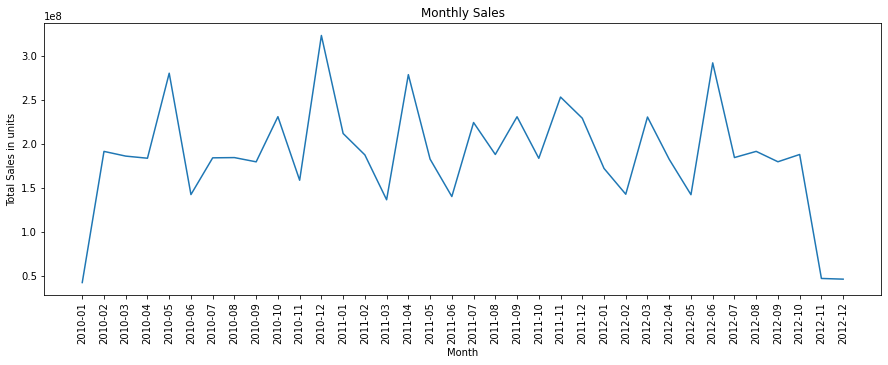

In [46]:
plt.figure(figsize=(15,5))
plt.plot(monthly_sales['Month_Year'].astype(str),monthly_sales['Weekly_Sales'])
plt.title('Monthly Sales')
plt.xlabel('Month')
plt.ylabel('Total Sales in units')
plt.xticks(rotation=90)
plt.show()

In [47]:
df.columns

Index(['Store', 'Date', 'Weekly_Sales', 'Holiday_Flag', 'Temperature',
       'Fuel_Price', 'CPI', 'Unemployment', 'Day', 'Month', 'Year',
       'Co-efficient of Mean to Std', 'Month_Year'],
      dtype='object')

Plot the relationship between the fuel_price and year

<AxesSubplot:xlabel='Year', ylabel='Fuel_Price'>

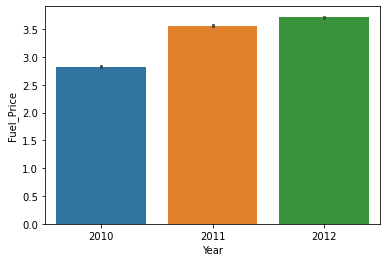

In [68]:
sns.barplot(x='Year',y='Fuel_Price',data=df)

From the above graph it is inferred that the price of the fuel increases as the year increases.

Plot the relationship between the weekly sales and the store

<AxesSubplot:xlabel='Store', ylabel='Weekly_Sales'>

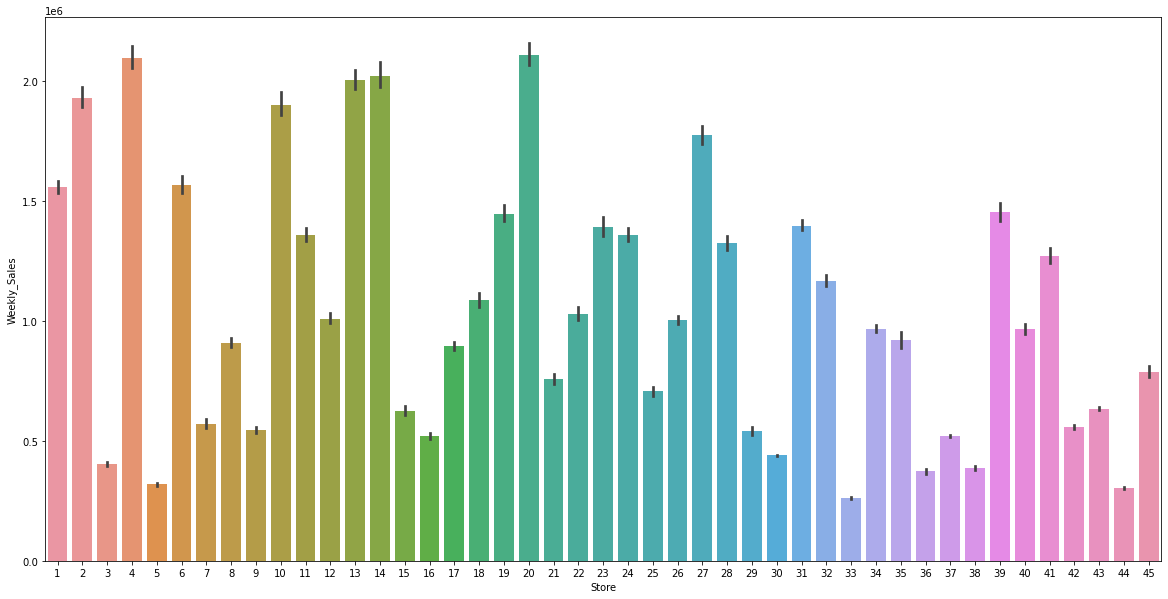

In [70]:
plt.figure(figsize=(20,10))
sns.barplot(x='Store',y='Weekly_Sales',data=df)

From the above figure Store 20 has the highest weekly sales

Plot the relationship between Store and the unemployment

<AxesSubplot:xlabel='Store', ylabel='Unemployment'>

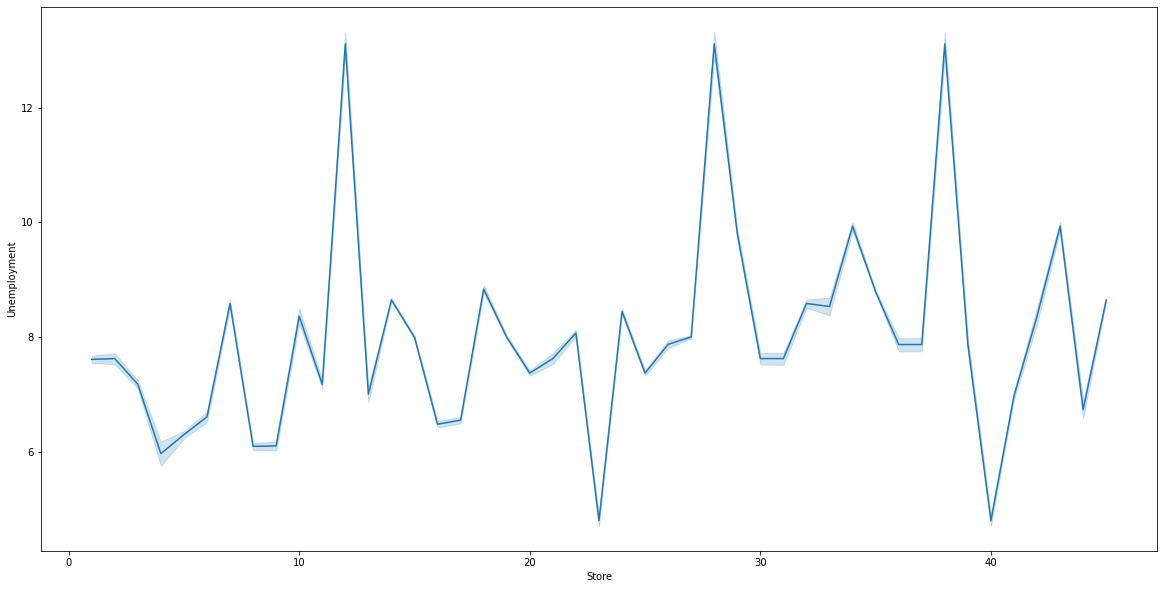

In [72]:
plt.figure(figsize=(20,10))
sns.lineplot(x='Store',y='Unemployment',data=df)

<AxesSubplot:xlabel='Store', ylabel='Unemployment'>

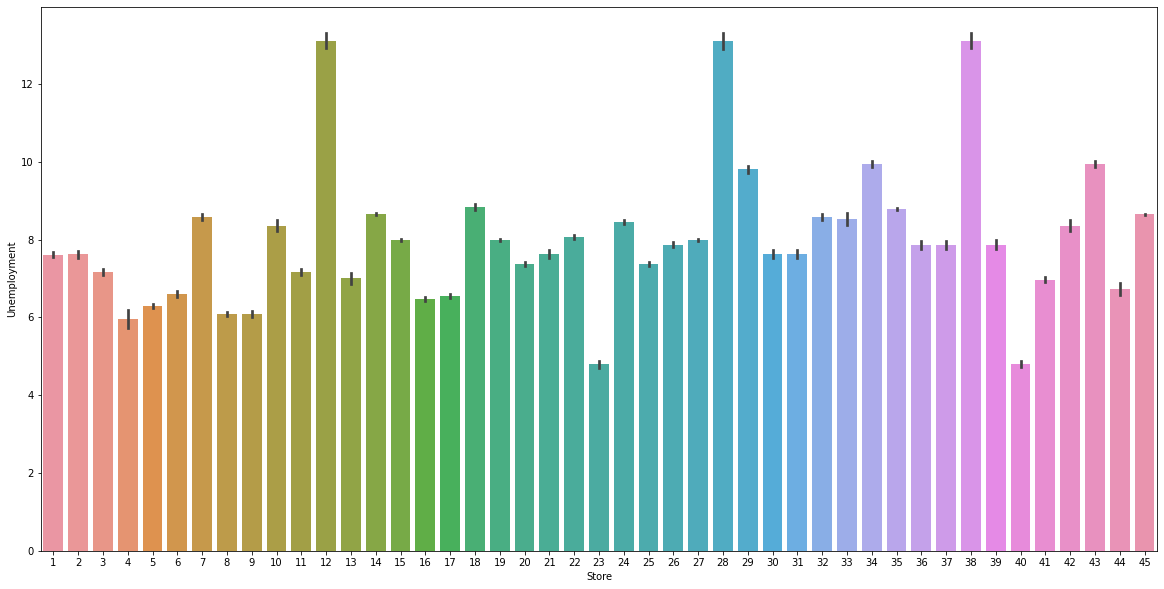

In [73]:
plt.figure(figsize=(20,10))
sns.barplot(x='Store',y='Unemployment',data=df)

From the above graph it is inferred that the store 12 has the highest unemployment rate.

In [48]:
#model to predict the demand 

from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(df.drop('Weekly_Sales',axis=1),df['Weekly_Sales'],test_size = 0.2, random_state = 42)

In [49]:
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer 
from sklearn.preprocessing import StandardScaler, OneHotEncoder

In [50]:
#data preprocessing 

numeric_transformer = Pipeline(steps = [
    ('imputer',SimpleImputer(strategy='median')),
    ('scaler',StandardScaler())
])

In [55]:
categorical_transformer = Pipeline(steps = [
    ('imputer',SimpleImputer(strategy='most_frequent')),
    ('onehot',OneHotEncoder(handle_unknown='ignore'))
])

In [56]:
df.dtypes

Store                                   int64
Date                           datetime64[ns]
Weekly_Sales                          float64
Holiday_Flag                            int64
Temperature                           float64
Fuel_Price                            float64
CPI                                   float64
Unemployment                          float64
Day                                     int64
Month                                   int64
Year                                    int64
Co-efficient of Mean to Std           float64
Month_Year                          period[M]
dtype: object

In [57]:
numeric_cols = ['Temperature','Fuel_Price','CPI','Unemployment']
categorical_cols = ['Store','Holiday_Flag','Day','Month','Year','Month_Year']

In [58]:
preprocessor = ColumnTransformer(transformers = [
   ('num',numeric_transformer,numeric_cols),('cat',categorical_transformer,categorical_cols)
])

In [60]:
x_train = preprocessor.fit_transform(x_train)
x_test = preprocessor.transform(x_test)

In [78]:
#random forest regressor model
from sklearn.ensemble import RandomForestRegressor

In [62]:
rf = RandomForestRegressor(n_estimators=100,random_state=42)

In [63]:
#fitting the model
rf.fit(x_train,y_train)

RandomForestRegressor(random_state=42)

In [64]:
#predictions of the dataset
y_predict = rf.predict(x_test)

In [80]:
#model evaluation
from sklearn.metrics import r2_score,mean_squared_error
r2 = r2_score(y_test,y_predict)
mse = mean_squared_error(y_test,y_predict)
rmse = sqrt(mean_squared_error(y_test,y_predict))
print("R2 Score : ",r2)
print("Mean Squared Error : ",mse)
print("Root Mean squared ",rmse)

R2 Score :  0.9292743511037951
Mean Squared Error :  22784590628.59517
Root Mean squared  150945.65455353516


In [81]:
#decision tree regressor model 
from sklearn.tree import DecisionTreeRegressor

In [82]:
dt = DecisionTreeRegressor(max_depth=3,random_state=0)

In [84]:
dt.fit(x_train,y_train)

DecisionTreeRegressor(max_depth=3, random_state=0)

In [85]:
y_pred = dt.predict(x_test)

In [86]:
r2 = r2_score(y_test,y_pred)
mse = mean_squared_error(y_test,y_pred)
rmse = sqrt(mean_squared_error(y_test,y_pred))
print("R2 Score : ",r2)
print("Mean Squared Error : ",mse)
print("Root Mean squared ",rmse)

R2 Score :  0.20231929770389356
Mean Squared Error :  256976479364.93274
Root Mean squared  506928.4755909188


In [89]:
pip install xgboost

Note: you may need to restart the kernel to use updated packages.


In [90]:
#xgboost regressor model 
from xgboost import XGBRegressor

In [91]:
xg = XGBRegressor()

In [92]:
xg.fit(x_train,y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             n_estimators=100, n_jobs=None, num_parallel_tree=None,
             predictor=None, random_state=None, ...)

In [93]:
y_pred_xg = xg.predict(x_test)

In [94]:
r2 = r2_score(y_test,y_pred_xg)
mse = mean_squared_error(y_test,y_pred_xg)
rmse = sqrt(mean_squared_error(y_test,y_pred_xg))
print("R2 Score : ",r2)
print("Mean Squared Error : ",mse)
print("Root Mean squared ",rmse)

R2 Score :  0.9630479590434368
Mean Squared Error :  11904268666.689518
Root Mean squared  109106.68479378117


In [95]:
#ridge regression
from sklearn.linear_model import Ridge

In [96]:
rd = Ridge(alpha=0.5)

In [97]:
rd.fit(x_train,y_train)

Ridge(alpha=0.5)

In [98]:
y_pred_rd = rd.predict(x_test)

In [99]:
r2 = r2_score(y_test,y_pred_rd)
mse = mean_squared_error(y_test,y_pred_rd)
rmse = sqrt(mean_squared_error(y_test,y_pred_rd))
print("R2 Score : ",r2)
print("Mean Squared Error : ",mse)
print("Root Mean squared ",rmse)

R2 Score :  0.9407353504443989
Mean Squared Error :  19092377375.755432
Root Mean squared  138175.16917216143


In [100]:
y_test

2436    1138800.32
3361    1304850.67
233     1769296.25
3667    1077640.13
5011     428851.99
           ...    
2600    1492060.89
6308     801098.43
6292     890689.51
151     2066187.72
2344     816138.33
Name: Weekly_Sales, Length: 1287, dtype: float64